In [1]:
import matplotlib.pyplot as plt
#import dataframe_image as dfi
from sklearn.metrics import jaccard_score
import networkx as nx
from scipy import stats
import seaborn as sns
import pandas as pd
import numpy as np
import sys
import os

nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
    
from Utils import evaluation_measures as ev
from Utils.code_utils import save_obj, load_obj

In [2]:
network_names = {'aagregated_subjects': 'Human Connectome','academia': 'Faculty Hiring US','airports': 'Worldwide Air Transportation','all_1m': 'Budapest Connectome 3','facebook-like-forum': 'Facebook Like Forum','foodweb_baywet': 'Florida Bay','game_thrones': 'Game of Thrones','gene interactions': 'Gene Interactions','hermaphrodite_gap_junction': 'C. elegans','highschool': 'Illinois High School','job_mobility_network_09_10': 'Job Mobility','karate_club': 'Karate Club','lesmis': 'Les Misérables','meetup-comembership': 'Meetup Dublin','messal_shale': 'Messel Shale','openflights': 'Openflights','paris_bus': 'Paris Bus','paris_rail': 'Paris Rail','residence_hall': 'ANU Residence Hall','salanthe-high-school': 'US-HS','shipping-2015': 'GLSN 2015','sociopatterns-conference': 'It-SC','sociopatterns-high-school': 'Fr-HS','sociopatterns-hospital': 'Fr-Ho','sociopatterns-primary-school': 'Fr-PS','sociopatterns-workplace': 'Fr-Wo','southern_club_women': 'Southern Women Club','sports_cotagging': 'Sports Cotagging','toth-elementary-school': 'US-ES','toth-middle-school': 'US-MS','train_terrorists': 'Madrid Train Bombing','us-airports-500': 'US Airports 500','webkb_cornell_cocite': 'Webkb Cornell','webkb_washington_cocite': 'Webkb Washington','windsurfers': 'Windsurfers','youtube-2': 'Youtube-SF','youtube-3': 'Youtube-SSP','youtube-4': 'Youtube-SSB','youtube-5': 'Youtube-SFV'}
network_category = {'Human Connectome': 'Biological', 'Faculty Hiring US': 'Economical', 'Worldwide Air Transportation': 'Infrastructural', 'Budapest Connectome 3': 'Biological', 'Facebook Like Forum': 'Online Social', 'Florida Bay': 'Biological', 'Game of Thrones': 'Character', 'Gene Interactions': 'Biological', 'C. elegans': 'Biological', 'Illinois High School': 'Offline Social', 'Job Mobility': 'Economical', 'Karate Club': 'Offline Social', 'Les Misérables': 'Character', 'Meetup Dublin': 'Online Social', 'Messel Shale': 'Biological', 'Openflights': 'Infrastructural', 'Paris Bus': 'Infrastructural', 'Paris Rail': 'Infrastructural', 'ANU Residence Hall': 'Offline Social', 'US-HS': 'Offline Social', 'GLSN 2015': 'Infrastructural', 'It-SC': 'Offline Social', 'Fr-HS': 'Offline Social', 'Fr-Ho': 'Offline Social', 'Fr-PS': 'Offline Social', 'Fr-Wo': 'Offline Social', 'Southern Women Club': 'Offline Social', 'Sports Cotagging': 'Online Social', 'US-ES': 'Offline Social', 'US-MS': 'Offline Social', 'Madrid Train Bombing': 'Offline Social', 'US Airports 500': 'Infrastructural', 'Webkb Cornell': 'Web', 'Webkb Washington': 'Web', 'Windsurfers': 'Offline Social', 'Youtube-SF': 'Online Social', 'Youtube-SSP': 'Online Social', 'Youtube-SSB': 'Online Social', 'Youtube-SFV': 'Online Social' }

In [3]:
labels={'degree': 'Degree', 'weight': 'Global Threshold','original':'Original Network', 'gloss_alpha':'GloSS', 'nc_alpha':'NC', 'mlf_score':'MLF', 'pf_alpha':'PF', 'df_alpha':'DF', 'hss_score':'High Salience Skeleton', 'global_score':'Global Threshold', 'lans_alpha':'LANS', 'ecm_alpha':'ECM'}
colors_backbone = {'mlf_score':'#4c72b0', 'weight':'#dd8452', 'lans_alpha':'#55a868', 'df_alpha':'#c44e52', 'ecm_alpha':'#8172b3', 'nc_alpha':'#937860', 'gloss_alpha':'#da8bc3', 'pf_alpha':'#8c8c8c'}#, '#ccb974', '#64b5cd'}backbones = ['mlf_score', 'df_alpha', 'lans_alpha', 'gloss_alpha', 'ecm_alpha', 'pf_alpha', 'nc_alpha']

backbones = ['mlf_score', 'df_alpha', 'lans_alpha', 'ecm_alpha', 'pf_alpha', 'nc_alpha', 'gloss_alpha']
backbones = backbones[::-1]

In [4]:
# Define Data Directory
data_directory_in_str = '/mnt/c/Users/Yassin/Desktop/Code/Backbones Survey 2022/Backbone Results/All/'


# Pearson Correlation between the scores of edges obtained by different Backbone Extraction techniques


## Corelation heatmap for each Network

In [14]:
res_corr = dict()

# Loop through the Networks
for file in os.listdir(os.fsencode(data_directory_in_str)):
    network = os.fsdecode(file)
    if network.endswith(".csv"):
    
        # Read the Graph with the p-values
        results = pd.read_csv(data_directory_in_str  + '/' + network)   

        results = results.drop(columns=['source', 'target', 'weight', 'betweenness', 'weighted_betweenness'])
        results = results.reindex(sorted(results.columns), axis=1)
        
        sns.set_theme(style="white")

        # Compute the correlation matrix
        corr = results.corr()
        corr = corr.abs()
        
        if corr['gloss_alpha'].isnull()[0]:
            corr = corr.drop(columns=['gloss_alpha'])
            corr = corr.drop(index=['gloss_alpha'])
            
        if corr['ecm_alpha'].isnull()[0]:
            corr = corr.drop(columns=['ecm_alpha'])
            corr = corr.drop(index=['ecm_alpha'])
            
        if corr['nc_alpha'].isnull()[0]:
            corr = corr.drop(columns=['nc_alpha'])
            corr = corr.drop(index=['nc_alpha'])
            
        if corr['pf_alpha'].isnull()[0]:
            corr = corr.drop(columns=['pf_alpha'])
            corr = corr.drop(index=['pf_alpha'])


        res_corr[network] = corr
 
        corr.rename(columns = {c:labels[c] for c in corr.columns}, inplace = True)
        corr.rename(index = {c:labels[c] for c in corr.index}, inplace = True)

        # Generate a mask for the upper triangle
        mask = np.triu(np.ones_like(corr, dtype=bool))

        # Set up the matplotlib figure
        f, ax = plt.subplots(figsize=(6, 5))

        # Generate a custom diverging colormap
        cmap = sns.diverging_palette(230, 20, as_cmap=True)

        # Draw the heatmap with the mask and correct aspect ratio
        sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=0, 
                    square=True, linewidths=.5, annot=True, ax=ax, annot_kws={"size":8})

        plt.title(network_names[network.split('.')[0]])

        #plt.tight_layout()
        plt.savefig('/mnt/c/Users/Yassin/Desktop/Code/Backbones Survey 2022/Figures/Pearson Correlation Results/Networks/' + network.split('.')[0] + '.tiff', dpi=300)
        plt.savefig('/mnt/c/Users/Yassin/Desktop/Code/Backbones Survey 2022/Figures/Pearson Correlation Results/Networks/' + network.split('.')[0] + '.png', dpi=300)
        plt.close()
        #break


## Correlation Heatmap Across all Networks

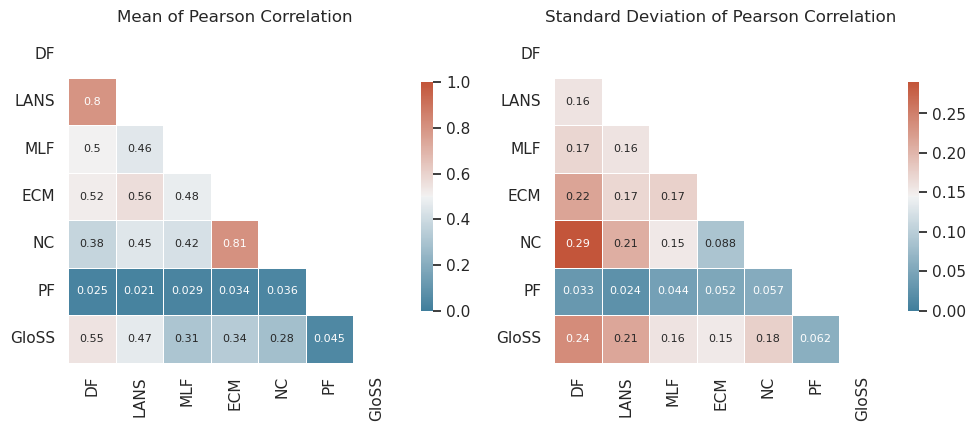

In [15]:
res_corr = res_corr.values()

df_concat = pd.concat(res_corr)

by_row_index = df_concat.groupby(df_concat.index)

df_means = by_row_index.mean()
df_means = df_means.reindex(df_means.columns)

# df_means.columns = [labels[label] for label in df_means.columns]
# df_means.index = [labels[label] for label in df_means.index]

df_variance = by_row_index.std()
df_variance = df_variance.reindex(df_variance.columns)
# df_variance.columns = [labels[label] for label in df_variance.columns]
# df_variance.index = [labels[label] for label in df_variance.index]


sns.set_theme(style="white")
fig, ax = plt.subplots(1, 2, figsize=(10,5))



# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
p = sns.heatmap(df_means, mask=np.triu(np.ones_like(df_means, dtype=bool)), cmap=cmap, vmax=1, vmin=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax = ax[0], annot=True, annot_kws={"size":8})

# Draw the heatmap with the mask and correct aspect ratio
g = sns.heatmap(df_variance, mask=np.triu(np.ones_like(df_variance, dtype=bool)), cmap=cmap, vmin=0,# vmax=1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax = ax[1], annot=True, annot_kws={"size":8})


ax[0].set_title('Mean of Pearson Correlation')
ax[1].set_title('Standard Deviation of Pearson Correlation')

g.set_yticklabels(g.get_yticklabels(), rotation=0)
p.set_yticklabels(p.get_yticklabels(), rotation=0)

g.set_xticklabels(g.get_xticklabels(), rotation=90)
p.set_xticklabels(p.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.savefig('/mnt/c/Users/Yassin/Desktop/Code/Backbones Survey 2022/Figures/Pearson Correlation Results/corr-heatmap.eps', dpi=300)
plt.savefig('/mnt/c/Users/Yassin/Desktop/Code/Backbones Survey 2022/Figures/Pearson Correlation Results/corr-heatmap.png', dpi=300)

# plt.close()
    

# Boxplot of Pearson Correlation between edge weights and scores across all networks

/home/yassin/anaconda3/envs/backbones-env/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/home/yassin/anaconda3/envs/backbones-env/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/home/yassin/anaconda3/envs/backbones-env/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/home/yassin/anaconda3/envs/backbones-env/lib/python3.10/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


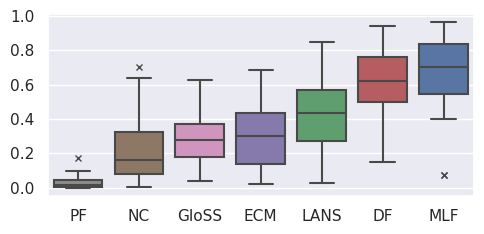

In [17]:
sns.set(font_scale = 0.5)

correlation_results = pd.DataFrame(index=backbones, columns=[os.fsdecode(file) for file in os.listdir(os.fsencode(data_directory_in_str)) if 'csv' in os.fsdecode(file)], dtype='float')

colors = colors_backbone 

# Loop through the Networks
for file in os.listdir(os.fsencode(data_directory_in_str)):
    network = os.fsdecode(file)
    if network.endswith(".csv"):

        # Read the Graph with the p-values
        results = pd.read_csv(data_directory_in_str  + '/' + network)    

        corr = pd.DataFrame(index=['weight'], columns=backbones)

        for name1 in corr.columns:
            if not (results[name1] == 0).all():
                # print(network + name1)
                corr[name1]['weight'] = stats.pearsonr(results[name1], results['weight'])[0]
#             try:
#                 corr[name1]['weight'] = stats.pearsonr(results[name1], results['weight'])[0]
#             except:
#                 print('In network ' + network+ ' Fixed values in: ' + name1)
                
    #     if corr['gloss_alpha'].isnull()[0]:
    #         corr = corr.drop(columns=['gloss_alpha'])

        corr = corr.T
        corr['weight'] = corr['weight'].abs()
        correlation_results[network] = corr['weight']
        #dfi.export(correlation_results, '/mnt/c/Users/Yassin/Desktop/Code/Backbones Survey 2022/Figures/Correlation Results/Dataframes/df.png')
        #break
    
correlation_results = correlation_results.T
correlation_results = correlation_results.reindex(columns=['pf_alpha', 'nc_alpha', 'gloss_alpha', 'ecm_alpha', 'lans_alpha', 'df_alpha', 'mlf_score'])


plt.figure(figsize=(5,2.5))
sns.set_theme(style="darkgrid")
sns.set_palette([colors[name] for name in correlation_results.columns])


g = sns.boxplot(data=correlation_results, meanline=True, flierprops={"marker": "x"})

g.set_xticklabels([labels[label] for label in correlation_results.columns])#, rotation=90)
g.set_yticks(np.arange(0, 1.2, step=0.2))
# b.set_yticklabels(b.get_yticks(), size = 15)
 

#plt.title('Pearson Correlation with weight across all netowrks')
plt.tight_layout()
plt.savefig('/mnt/c/Users/Yassin/Desktop/Code/Backbones Survey 2022/Figures/Pearson Correlation Results/corr-weight-boxplot.eps', dpi=300)#, bbox_inches='tight'
plt.savefig('/mnt/c/Users/Yassin/Desktop/Code/Backbones Survey 2022/Figures/Pearson Correlation Results/corr-weight-boxplot.png', dpi=300)#, bbox_inches='tight'

In [20]:
correlation_results = correlation_results.fillna(-1)
correlation_results = correlation_results.convert_dtypes(infer_objects=True)


correlation_results.rename(columns = {c:labels[c] for c in correlation_results.columns}, inplace = True)
correlation_results.rename(index = {c:network_names[c.split('.csv')[0]] for c in correlation_results.index}, inplace = True)

correlation_results['Type'] = correlation_results.apply(lambda row: network_category[row.name.split('.csv')[0]], axis=1)
correlation_results = correlation_results.reset_index(names='Network')


correlation_results.set_index(['Type','Network'], inplace=True)


correlation_results = correlation_results.sort_values(by='Type',ascending=True)

correlation_results = correlation_results.round(3)

In [21]:
correlation_results.style.applymap(lambda x: "background-color: white" if isinstance(x,str) else ("background-color: red" if x>0.7 else "background-color: white" ))


# Pearson Correlation between edge Degree and p-values for each network

/home/yassin/anaconda3/envs/backbones-env/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/home/yassin/anaconda3/envs/backbones-env/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/home/yassin/anaconda3/envs/backbones-env/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/home/yassin/anaconda3/envs/backbones-env/lib/python3.10/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


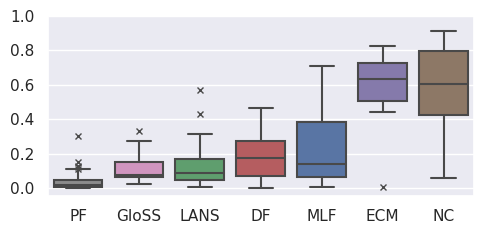

In [18]:
sns.set(font_scale = 0.5)

# Define Data Directory
data_directory_in_str = '/mnt/c/Users/Yassin/Desktop/Code/Backbones Survey 2022/Backbone Results/All/'


correlation_results = pd.DataFrame(index=backbones, columns=[os.fsdecode(file) for file in os.listdir(os.fsencode(data_directory_in_str)) if 'csv' in os.fsdecode(file)], dtype='float')


# Loop through the Networks
for file in os.listdir(os.fsencode(data_directory_in_str)):
    network = os.fsdecode(file)
    if network.endswith(".csv"):

        # Read the Graph with the p-values
        results = pd.read_csv(data_directory_in_str + network)    

        g = nx.from_pandas_edgelist(results)
        results['degree'] = results.apply(lambda row: g.degree[row.source]*g.degree[row.target], axis=1)

        corr = pd.DataFrame(index=['degree'], columns=backbones)

        for name1 in corr.columns:
            if not (results[name1] == 0).all():
                corr[name1]['degree'] = stats.pearsonr(results[name1], results['degree'])[0]
            # try:
            #     corr[name1]['degree'] = stats.pearsonr(results[name1], results['degree'])[0]
            # except:
            #     print('In network ' + network+ ' Fixed values in: ' + name1)
                
                
            

            

        corr = corr.T
        corr['degree'] = corr['degree'].abs()
        correlation_results[network] = corr['degree']
correlation_results = correlation_results.T
correlation_results = correlation_results.reindex(columns=['pf_alpha', 'gloss_alpha', 'lans_alpha', 'df_alpha', 'mlf_score', 'ecm_alpha', 'nc_alpha'])


plt.figure(figsize=(5,2.5))

sns.set_theme(style="darkgrid")
sns.set_palette([colors[name] for name in correlation_results.columns])


g = sns.boxplot(data=correlation_results, meanline=True, flierprops={"marker": "x"})

g.set_xticklabels([labels[label] for label in correlation_results.columns])#, rotation=90)
g.set_yticks(np.arange(0, 1.2, step=0.2))

#plt.title('Pearson Correlation with weight across all netowrks')
plt.tight_layout()
plt.savefig('/mnt/c/Users/Yassin/Desktop/Code/Backbones Survey 2022/Figures/Pearson Correlation Results/corr-edge-degree-boxplot.eps', dpi=300)
plt.savefig('/mnt/c/Users/Yassin/Desktop/Code/Backbones Survey 2022/Figures/Pearson Correlation Results/corr-edge-degree-boxplot.png', dpi=300)

In [25]:
correlation_results = correlation_results.fillna(-1)
correlation_results = correlation_results.convert_dtypes(infer_objects=True)


correlation_results.rename(columns = {c:labels[c] for c in correlation_results.columns}, inplace = True)
correlation_results.rename(index = {c:network_names[c.split('.csv')[0]] for c in correlation_results.index}, inplace = True)

correlation_results['Type'] = correlation_results.apply(lambda row: network_category[row.name.split('.csv')[0]], axis=1)
correlation_results = correlation_results.reset_index(names='Network')


correlation_results.set_index(['Type','Network'], inplace=True)


correlation_results = correlation_results.sort_values(by='Type',ascending=True)

correlation_results = correlation_results.round(3)

In [26]:
correlation_results.style.applymap(lambda x: "background-color: white" if isinstance(x,str) else ("background-color: red" if x>0.7 else "background-color: white" ))


# Pearson Correlation between edge betweenness and p-values for each network

/home/yassin/anaconda3/envs/backbones-env/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/home/yassin/anaconda3/envs/backbones-env/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/home/yassin/anaconda3/envs/backbones-env/lib/python3.10/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


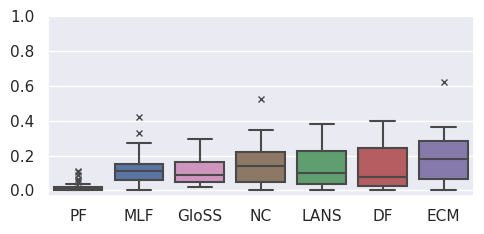

In [19]:
sns.set(font_scale = 0.5)

# Define Data Directory
data_directory_in_str = '/mnt/c/Users/Yassin/Desktop/Code/Backbones Survey 2022/Backbone Results/All/'


correlation_results = pd.DataFrame(index=backbones)#, columns=[os.fsdecode(file) for file in os.listdir(os.fsencode(data_directory_in_str)) if 'csv' in os.fsdecode(file)], dtype='float')


# Loop through the Networks
for file in os.listdir(os.fsencode(data_directory_in_str)):
    filename = os.fsdecode(file)
    if filename.endswith(".csv"):
        network = filename.split('.')[0]

        # Read the Graph with the p-values
        results = pd.read_csv(data_directory_in_str + filename)    

        corr = pd.DataFrame(index=['betweenness'], columns=backbones)

        for name1 in corr.columns:
            if not (results[name1] == 0).all():
                if not (results['betweenness'].isna()).any(): 
                    corr[name1] = stats.pearsonr(results[name1], results['betweenness'])[0]
                    # print(network, name1)

            
  
        corr = corr.T
        corr['betweenness'] = corr['betweenness'].abs()
        correlation_results[network] = corr['betweenness']
        #break
correlation_results = correlation_results.T
correlation_results = correlation_results.reindex(columns=['pf_alpha', 'mlf_score', 'gloss_alpha', 'nc_alpha', 'lans_alpha', 'df_alpha', 'ecm_alpha'])


plt.figure(figsize=(5,2.5))
sns.set_theme(style="darkgrid")
sns.set_palette([colors[name] for name in correlation_results.columns])


g = sns.boxplot(data=correlation_results, meanline=True, flierprops={"marker": "x"})

g.set_xticklabels([labels[label] for label in correlation_results.columns])#, rotation=90)
g.set_yticks(np.arange(0, 1.2, step=0.2))


plt.tight_layout()
plt.savefig('/mnt/c/Users/Yassin/Desktop/Code/Backbones Survey 2022/Figures/Pearson Correlation Results/corr-edge-betweenness-boxplot.eps', dpi=300)
plt.savefig('/mnt/c/Users/Yassin/Desktop/Code/Backbones Survey 2022/Figures/Pearson Correlation Results/corr-edge-betweenness-boxplot.png', dpi=300)

In [28]:
correlation_results = correlation_results.reindex(columns=['pf_alpha', 'nc_alpha', 'gloss_alpha', 'ecm_alpha', 'lans_alpha', 'df_alpha', 'mlf_score'])

correlation_results = correlation_results.fillna(-1)
correlation_results = correlation_results.convert_dtypes(infer_objects=True)


correlation_results.rename(columns = {c:labels[c] for c in correlation_results.columns}, inplace = True)
correlation_results.rename(index = {c:network_names[c.split('.csv')[0]] for c in correlation_results.index}, inplace = True)

correlation_results['Type'] = correlation_results.apply(lambda row: network_category[row.name.split('.csv')[0]], axis=1)
correlation_results = correlation_results.reset_index(names='Network')


correlation_results.set_index(['Type','Network'], inplace=True)


correlation_results = correlation_results.sort_values(by='Type',ascending=True)

correlation_results = correlation_results.round(3)

In [29]:
correlation_results.style.applymap(lambda x: "background-color: white" if isinstance(x,str) else ("background-color: red" if ((x>0.7)) else "background-color: white" ))

# Jaccard Similarity

## W.r.t Edge Fraction

In [97]:
ps=[0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]

backbone_couples = []
results = pd.read_csv(data_directory_in_str + 'lesmis.csv')  
results = results.drop(columns=['source', 'target', 'weight', 'weighted_betweenness', 'betweenness'])
for r in results.columns:
    for g in results.columns:
        if g != r:
            backbone_couples.append(r + '-' + g)
        else:
            break
            
# Define Data Directory
data_directory_in_str = '/mnt/c/Users/Yassin/Desktop/Code/Backbones Survey 2022/Backbone Results/All/'


rbo_res = pd.DataFrame(index=backbone_couples, columns=ps)

# Loop through the Networks
for file in os.listdir(os.fsencode(data_directory_in_str)):
    filename = os.fsdecode(file)
    if filename.endswith(".csv"):
        
        #filename = 'lesmis.csv'
        network = filename.split('.')[0]
        
        # Read the Graph with the p-values
        results = pd.read_csv(data_directory_in_str + filename)  
        results['edge'] = results.apply(lambda row: str(int(row.source)) + '-' + str(int(row.target)), axis=1)
                
        for p in ps:
            p_col = []
            for couple in backbone_couples:
                name1 = couple.split('-')[0]
                name2 = couple.split('-')[1]

                if (not (results[name1] == 0).all()) and (not (results[name2] == 0).all()):
                    l1 = results.sort_values([name1, 'weight'], ascending=[True if 'alpha' in name1 else False, False])[:int(results.shape[0]*p)]['edge'].values
                    l2 = results.sort_values([name2, 'weight'], ascending=[True if 'alpha' in name2 else False, False])[:int(results.shape[0]*p)]['edge'].values
                    
                    p_col.append(ev.jaccard_similarity(l1,l2))
                else:
                    p_col.append(-1)

            rbo_res[p] = p_col  
            
        data=rbo_res.T
        palette = []
        for c in data.columns:
            if (data[c] == -1).all():
                data = data.drop(columns=c)
            else:
                palette.append(colors_backbone_couples[c])

        data.rename(columns = {c:labels[c.split('-')[0]] + '-' + labels[c.split('-')[1]] for c in data.columns}, inplace = True)

        sns.set()
        fig, ax = plt.subplots(figsize=(6.5,5))
        sns.lineplot(data, palette=palette)
        sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
        plt.title(network_names[network])
        plt.xlabel('Fraction of Edges')
        plt.ylabel('Jaccard Score')
        plt.tight_layout()
        plt.savefig('/mnt/c/Users/Yassin/Desktop/Code/Backbones Survey 2022/Figures/Jaccard - w.r.t. Fraction of Edges/Networks/' + network_names[network] + '.eps', dpi=300)
        plt.savefig('/mnt/c/Users/Yassin/Desktop/Code/Backbones Survey 2022/Figures/Jaccard - w.r.t. Fraction of Edges/Networks/' + network_names[network] + '.png', dpi=300)
        plt.close()
        save_obj(data, '/mnt/c/Users/Yassin/Desktop/Code/Backbones Survey 2022/Variables/Jaccard - w.r.t. Fraction of Edges/',  network.split('.')[0])
        
        break

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [73]:
res_corr = {}

for file in os.listdir(os.fsencode(data_directory_in_str)):
    filename = os.fsdecode(file)
    if filename.endswith(".csv"):

        #filename = 'lesmis.csv'
        network = filename.split('.')[0]

        res_corr[network] = load_obj('/mnt/c/Users/Yassin/Desktop/Code/Backbones Survey 2022/Variables/Jaccard/',  network).T

        
res_corr = res_corr.values()

df_concat = pd.concat(res_corr)
by_row_index = df_concat.groupby(df_concat.index)

df_means = by_row_index.mean().T
df_variance = by_row_index.std().T



colors_backbone_couples = {'LANS-GloSS':'#e6194b', 'NC-GloSS': '#3cb44b',  'NC-LANS': '#ffe119', 'MLF-GloSS': '#4363d8', 'MLF-LANS': '#f58231', 'MLF-NC': '#911eb4', 'PF-GloSS': '#46f0f0', 'PF-LANS': '#f032e6', 'PF-NC': '#bcf60c', 'PF-MLF': '#fabebe', 'DF-GloSS': '#008080', 'DF-LANS': '#e6beff', 'DF-NC': '#9a6324', 'DF-MLF': '#fffac8', 'DF-PF': '#800000', 'ECM-GloSS': '#aaffc3', 'ECM-LANS': '#808000', 'ECM-NC': '#ffd8b1', 'ECM-MLF': '#000075', 'ECM-PF': '#808080', 'ECM-DF': '#000000'}

for c in df_means.columns:
    sns.set()
    fig, ax = plt.subplots(figsize=(5,5))
    ax.errorbar(df_means.index, df_means[c], yerr = df_variance[c], label=c)
    
    plt.yticks(np.arange(0, 1, step=0.1))
    
    plt.xlabel('Fraction of Edges')
    plt.ylabel('Jaccard Score')
    
    ax.legend()
    plt.tight_layout()
    plt.savefig('/mnt/c/Users/Yassin/Desktop/Code/Backbones Survey 2022/Figures/Jaccard/' + c + '.eps', dpi=300)
    plt.savefig('/mnt/c/Users/Yassin/Desktop/Code/Backbones Survey 2022/Figures/Jaccard/' + c + '.png', dpi=300)
    plt.close()
    # break
    

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

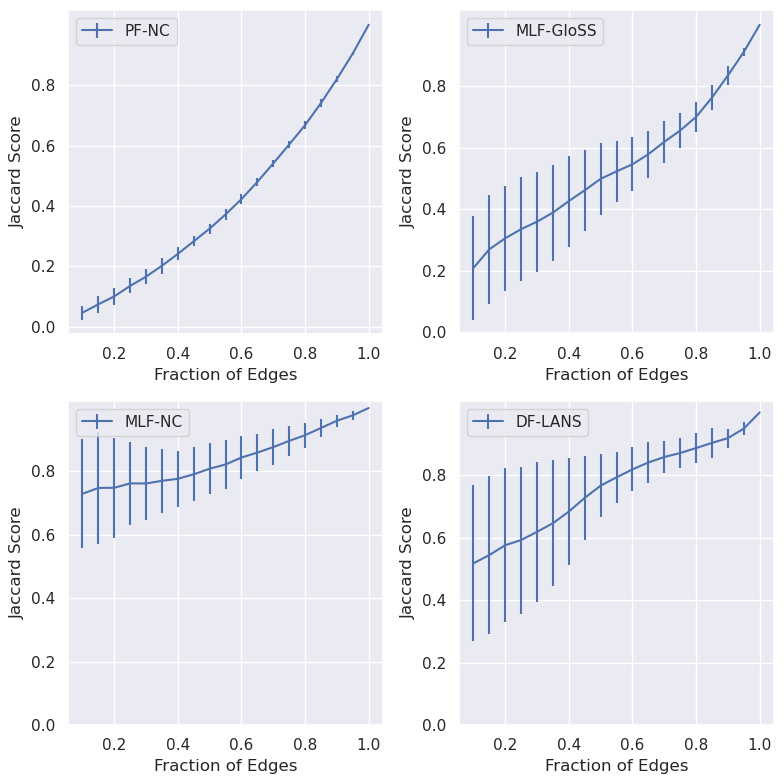

In [47]:
res_corr = {}

for file in os.listdir(os.fsencode(data_directory_in_str)):
    filename = os.fsdecode(file)
    if filename.endswith(".csv"):

        #filename = 'lesmis.csv'
        network = filename.split('.')[0]

        res_corr[network] = load_obj('/mnt/c/Users/Yassin/Desktop/Code/Backbones Survey 2022/Variables/Jaccard - w.r.t. Fraction of Edges/',  network).T

        
res_corr = res_corr.values()

df_concat = pd.concat(res_corr)
by_row_index = df_concat.groupby(df_concat.index)

df_means = by_row_index.mean().T
df_variance = by_row_index.std().T



sns.set()
fig, axs = plt.subplots(2, 2, figsize=(8,8))


for i, c in enumerate(['PF-NC', 'MLF-GloSS', 'MLF-NC','DF-LANS']):
    axs[int(i/2), i%2].errorbar(x=df_means.index, y=df_means[c].values, yerr=df_variance[c].values, label=c)
    axs[int(i/2), i%2].legend()
    
    axs[int(i/2), i%2].set_yticks(np.arange(0, 1, step=0.2))

    axs[int(i/2), i%2].set_xlabel('Fraction of Edges')
    axs[int(i/2), i%2].set_ylabel('Jaccard Score')
    

plt.tight_layout()
# plt.savefig('/mnt/c/Users/Yassin/Desktop/Code/Backbones Survey 2022/Figures/jaccard-all.eps', dpi=300)
# plt.savefig('/mnt/c/Users/Yassin/Desktop/Code/Backbones Survey 2022/Figures/jaccard-all.png', dpi=300)
# plt.close()

